In [1]:
import sys

In [2]:
sys.path.append(r'../HelperFunctions')

In [20]:
import DataHelper as dh
import AugHelper as ah
import ModelConfigHelper as mch

In [33]:
from YVMModel import YVMModel

In [89]:
model = YVMModel()

In [63]:
path_info = dh.getFileDirectory()

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yellow Mosaic\dataset\archive(7)\data-resize\train


In [64]:
train_df = dh.getDataFrame(pathInfo=path_info)

In [65]:
train_df

,imgPath,label,augmentation
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
...,...,...,...
1582,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
1583,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
1584,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
1585,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal


In [66]:
dh.showFileCount(pathInfo=path_info)

diseased okra leaf :-
885
fresh okra leaf :-
702


In [67]:
path_info = dh.getFileDirectory()

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yellow Mosaic\dataset\archive(7)\data-resize\val


In [68]:
dh.showFileCount(path_info)

diseased okra leaf :-
143
fresh okra leaf :-
131


In [69]:
val_df = dh.getDataFrame(pathInfo=path_info)

In [70]:
val_df

,imgPath,label,augmentation
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
...,...,...,...
269,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
270,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal
271,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,diseased okra leaf,normal
272,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,fresh okra leaf,normal


In [71]:
dictlabel = dh.getLabelDicts(df=train_df)

In [72]:
train_df = dh.dfPreProcess(df=train_df)
val_df = dh.dfPreProcess(df=val_df)

In [73]:
train_df

,imgPath,augmentation,ylabel
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
...,...,...,...
1582,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
1583,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
1584,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
1585,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1


In [74]:
val_df

,imgPath,augmentation,ylabel
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
...,...,...,...
269,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
270,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1
271,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,0
272,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,normal,1


In [75]:
dictlabel

Index(['diseased okra leaf', 'fresh okra leaf'], dtype='object')

In [76]:
imgTransform = ah.getImageTransform(224)

In [77]:
imgTransform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [78]:
augDict = ah.getAugmentation(augmentRequired=True,augmentPolicies=[ah.transforms.AutoAugmentPolicy.IMAGENET],angle=90)

In [79]:
augDict

{'hFlip': RandomHorizontalFlip(p=1),
 'vFlip': RandomVerticalFlip(p=1),
 'rot': RandomRotation(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0),
 'aug0': AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None)}

In [80]:
train_df = ah.augmentDataFrame(df=train_df,augDict=augDict)

In [81]:
train_df

,imgPath,augmentation,ylabel
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,hFlip,0
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,vFlip,0
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,hFlip,0
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,vFlip,0
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,vFlip,1
...,...,...,...
7930,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,hFlip,0
7931,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,hFlip,0
7932,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,vFlip,1
7933,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Yel...,aug0,1


In [82]:
train_ds = ah.KroniaDataset(data=train_df,transforms=imgTransform)
val_ds = ah.KroniaDataset(data=val_df,transforms=imgTransform)

In [83]:
import torch.optim as optim
from torch.utils.data import DataLoader

In [84]:
model

YVMModel(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=18432, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [85]:
train_dl = DataLoader(dataset=train_ds,batch_size=32,shuffle=True)
val_dl = DataLoader(dataset=val_ds,batch_size=32,shuffle=True)

In [86]:
import torch
torch.manual_seed(42)

In [90]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [91]:
train_loss,val_loss = mch.trainModel(model=model,train_dl=train_dl,val_dl=val_dl,criterion=criterion,optim=optimizer,train_samples=7935,batch_size=32,soft_max=False)

============= New Epoch =========================
epoch:  0  batch:    2 [    64/7935]  loss: 0.75849581      accuracy:  48.438%
epoch:  0  batch:    4 [   128/7935]  loss: 0.68432945      accuracy:  48.438%
epoch:  0  batch:    6 [   192/7935]  loss: 0.68996471      accuracy:  48.438%
epoch:  0  batch:    8 [   256/7935]  loss: 0.68485767      accuracy:  49.609%
epoch:  0  batch:   10 [   320/7935]  loss: 0.64991438      accuracy:  55.625%
epoch:  0  batch:   12 [   384/7935]  loss: 0.58946180      accuracy:  59.635%
epoch:  0  batch:   14 [   448/7935]  loss: 0.55980891      accuracy:  59.598%
epoch:  0  batch:   16 [   512/7935]  loss: 0.49468797      accuracy:  61.133%
epoch:  0  batch:   18 [   576/7935]  loss: 0.41514039      accuracy:  61.979%
epoch:  0  batch:   20 [   640/7935]  loss: 0.45992950      accuracy:  63.750%
epoch:  0  batch:   22 [   704/7935]  loss: 0.43163079      accuracy:  65.199%
epoch:  0  batch:   24 [   768/7935]  loss: 0.58881968      accuracy:  65.495%
ep

epoch:  0  batch:  210 [  6720/7935]  loss: 0.09136675      accuracy:  88.423%
epoch:  0  batch:  212 [  6784/7935]  loss: 0.12743515      accuracy:  88.429%
epoch:  0  batch:  214 [  6848/7935]  loss: 0.35156956      accuracy:  88.449%
epoch:  0  batch:  216 [  6912/7935]  loss: 0.14224385      accuracy:  88.498%
epoch:  0  batch:  218 [  6976/7935]  loss: 0.17087097      accuracy:  88.546%
epoch:  0  batch:  220 [  7040/7935]  loss: 0.08011989      accuracy:  88.580%
epoch:  0  batch:  222 [  7104/7935]  loss: 0.10732499      accuracy:  88.654%
epoch:  0  batch:  224 [  7168/7935]  loss: 0.20263091      accuracy:  88.700%
epoch:  0  batch:  226 [  7232/7935]  loss: 0.12777324      accuracy:  88.744%
epoch:  0  batch:  228 [  7296/7935]  loss: 0.10327087      accuracy:  88.802%
epoch:  0  batch:  230 [  7360/7935]  loss: 0.25482112      accuracy:  88.832%
epoch:  0  batch:  232 [  7424/7935]  loss: 0.20956500      accuracy:  88.874%
epoch:  0  batch:  234 [  7488/7935]  loss: 0.153066

epoch:  1  batch:  170 [  5440/7935]  loss: 0.13426283      accuracy:  94.651%
epoch:  1  batch:  172 [  5504/7935]  loss: 0.17274736      accuracy:  94.658%
epoch:  1  batch:  174 [  5568/7935]  loss: 0.09876287      accuracy:  94.684%
epoch:  1  batch:  176 [  5632/7935]  loss: 0.13725565      accuracy:  94.673%
epoch:  1  batch:  178 [  5696/7935]  loss: 0.12484824      accuracy:  94.698%
epoch:  1  batch:  180 [  5760/7935]  loss: 0.15520215      accuracy:  94.705%
epoch:  1  batch:  182 [  5824/7935]  loss: 0.09977679      accuracy:  94.660%
epoch:  1  batch:  184 [  5888/7935]  loss: 0.23620954      accuracy:  94.616%
epoch:  1  batch:  186 [  5952/7935]  loss: 0.06272634      accuracy:  94.624%
epoch:  1  batch:  188 [  6016/7935]  loss: 0.05017015      accuracy:  94.648%
epoch:  1  batch:  190 [  6080/7935]  loss: 0.08021207      accuracy:  94.622%
epoch:  1  batch:  192 [  6144/7935]  loss: 0.06926707      accuracy:  94.661%
epoch:  1  batch:  194 [  6208/7935]  loss: 0.182469

epoch:  2  batch:  130 [  4160/7935]  loss: 0.00922396      accuracy:  96.875%
epoch:  2  batch:  132 [  4224/7935]  loss: 0.14723459      accuracy:  96.875%
epoch:  2  batch:  134 [  4288/7935]  loss: 0.03291573      accuracy:  96.898%
epoch:  2  batch:  136 [  4352/7935]  loss: 0.02164396      accuracy:  96.944%
epoch:  2  batch:  138 [  4416/7935]  loss: 0.13316241      accuracy:  96.966%
epoch:  2  batch:  140 [  4480/7935]  loss: 0.04234303      accuracy:  96.964%
epoch:  2  batch:  142 [  4544/7935]  loss: 0.05352684      accuracy:  96.963%
epoch:  2  batch:  144 [  4608/7935]  loss: 0.07069451      accuracy:  96.984%
epoch:  2  batch:  146 [  4672/7935]  loss: 0.02240704      accuracy:  97.025%
epoch:  2  batch:  148 [  4736/7935]  loss: 0.25664470      accuracy:  96.981%
epoch:  2  batch:  150 [  4800/7935]  loss: 0.01201317      accuracy:  97.021%
epoch:  2  batch:  152 [  4864/7935]  loss: 0.02788808      accuracy:  97.039%
epoch:  2  batch:  154 [  4928/7935]  loss: 0.064919

epoch:  3  batch:   90 [  2880/7935]  loss: 0.00407490      accuracy:  99.410%
epoch:  3  batch:   92 [  2944/7935]  loss: 0.04676343      accuracy:  99.389%
epoch:  3  batch:   94 [  3008/7935]  loss: 0.02728568      accuracy:  99.402%
epoch:  3  batch:   96 [  3072/7935]  loss: 0.01949855      accuracy:  99.414%
epoch:  3  batch:   98 [  3136/7935]  loss: 0.01402369      accuracy:  99.394%
epoch:  3  batch:  100 [  3200/7935]  loss: 0.00194332      accuracy:  99.406%
epoch:  3  batch:  102 [  3264/7935]  loss: 0.10713653      accuracy:  99.387%
epoch:  3  batch:  104 [  3328/7935]  loss: 0.04930139      accuracy:  99.309%
epoch:  3  batch:  106 [  3392/7935]  loss: 0.02804268      accuracy:  99.263%
epoch:  3  batch:  108 [  3456/7935]  loss: 0.30329213      accuracy:  99.161%
epoch:  3  batch:  110 [  3520/7935]  loss: 0.02634988      accuracy:  99.176%
epoch:  3  batch:  112 [  3584/7935]  loss: 0.15369414      accuracy:  99.107%
epoch:  3  batch:  114 [  3648/7935]  loss: 0.016386

epoch:  4  batch:   50 [  1600/7935]  loss: 0.00062220      accuracy:  99.812%
epoch:  4  batch:   52 [  1664/7935]  loss: 0.00334013      accuracy:  99.820%
epoch:  4  batch:   54 [  1728/7935]  loss: 0.00535335      accuracy:  99.826%
epoch:  4  batch:   56 [  1792/7935]  loss: 0.00297549      accuracy:  99.833%
epoch:  4  batch:   58 [  1856/7935]  loss: 0.00269622      accuracy:  99.838%
epoch:  4  batch:   60 [  1920/7935]  loss: 0.00029695      accuracy:  99.844%
epoch:  4  batch:   62 [  1984/7935]  loss: 0.00479631      accuracy:  99.849%
epoch:  4  batch:   64 [  2048/7935]  loss: 0.00059675      accuracy:  99.854%
epoch:  4  batch:   66 [  2112/7935]  loss: 0.00014805      accuracy:  99.858%
epoch:  4  batch:   68 [  2176/7935]  loss: 0.00074926      accuracy:  99.862%
epoch:  4  batch:   70 [  2240/7935]  loss: 0.00332059      accuracy:  99.866%
epoch:  4  batch:   72 [  2304/7935]  loss: 0.00116521      accuracy:  99.870%
epoch:  4  batch:   74 [  2368/7935]  loss: 0.057749

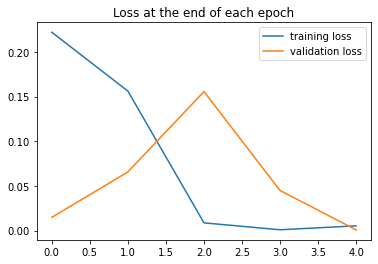

In [92]:
mch.visualiziseTrainResults(train_losses=train_loss,test_losses=val_loss)

In [94]:
# mch.saveModel(model=model,filename="YVMweights")